# Presentado por:
Giovanni Acuña Morales ***A01794007***

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
#Nuestras librerias
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,  make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split, RepeatedKFold, cross_validate


In [3]:
#La primer division del ejercicio se hace a partir de la linea 23, vamonos para haya

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [4]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

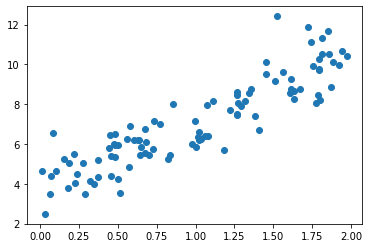

In [5]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [6]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [7]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [8]:
#X_fit[]

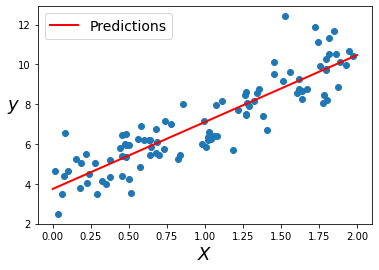

In [9]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [10]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [11]:
X_new.shape

(2, 1)

In [12]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [13]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [14]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [15]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

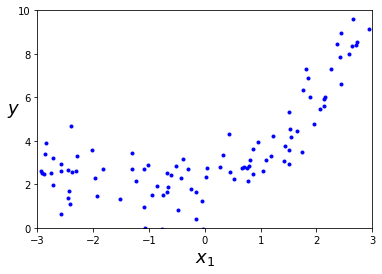

In [16]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [17]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [19]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [20]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [21]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [22]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

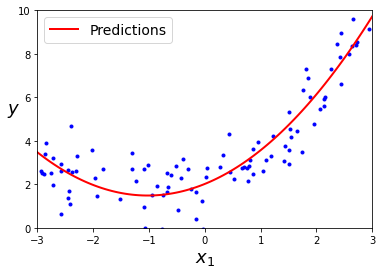

In [23]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

**Ejercicio 1.** Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.


*   Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).
*   Regresión Lineal.
*   Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.
*   Regresión Polinomial.
*   Realiza la regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.
*   Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.
*   Finalmente grafica :
**MAE** (de los cuatro métodos)
**R2** (de los cuatro métodos)
*   Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

In [24]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [25]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [26]:
len(X)

1000

In [27]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

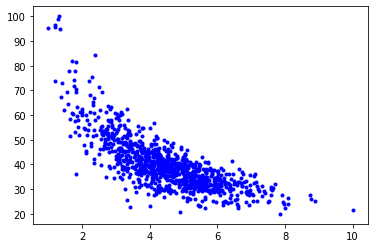

In [28]:
plt.plot(X,y,'b.')

Divide los datos del costo de manufactura. Utiliza la función train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)
lista_para_mae =[]
lista_para_r2 =[]

*   Regresión Lineal.
*   Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

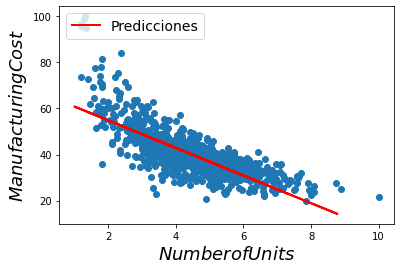

In [30]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)
X_para_regresion = X_test
y_para_regresion = linear_reg.predict(X_para_regresion)
plt.scatter(X_train, y_train)
plt.plot(X_para_regresion, y_para_regresion, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$Number of Units$", fontsize=18)
plt.ylabel("$Manufacturing Cost$", rotation=90, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [31]:
linear_reg.coef_,
linear_reg.intercept_

mae_regresion_lineal_simple = metrics.mean_absolute_error(y_test,y_para_regresion)
lista_para_mae.append(mae_regresion_lineal_simple)
r2_regresion_lineal_simple = r2_score(y_test,y_para_regresion)
lista_para_r2.append(r2_regresion_lineal_simple)

print(f'El modelo contiene:\n\tY = {linear_reg.coef_[0]}\n\tX = {linear_reg.intercept_}\n')
print(f'El Error Medio Absoluto (MAE) es : {metrics.mean_absolute_error(y_test,y_para_regresion)}\n')
print(f'El Error Medio Cuadrado (RMSE) es : {np.sqrt(metrics.mean_squared_error(y_test, y_para_regresion))}\n')
print(f'La R cuadrada es r2_score: {r2_score(y_test,y_para_regresion)}')

El modelo contiene:
	Y = -5.988826991706113
	X = 66.83650741226988

El Error Medio Absoluto (MAE) es : 5.013587781954963

El Error Medio Cuadrado (RMSE) es : 7.108963321847682

La R cuadrada es r2_score: 0.6116251549562579


In [32]:
caracteristicas_para_poly = PolynomialFeatures(degree=2, include_bias=False)
X_polinomial = caracteristicas_para_poly.fit_transform(X_train)
print(f'Input: {caracteristicas_para_poly.n_input_features_}')
print(f'Ouput: {caracteristicas_para_poly.n_output_features_}')
print(f'Powersn: {caracteristicas_para_poly.powers_}')

regresion_lineal_poli = LinearRegression(fit_intercept=True)
regresion_lineal_poli.fit(X_polinomial, y_train)
regresion_lineal_poli.coef_, regresion_lineal_poli.intercept_

Input: 1
Ouput: 2
Powersn: [[1]
 [2]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)


(array([-16.40638102,   1.13136095]), 88.80179909112496)

In [33]:
X_polinomial.shape

(900, 2)

In [34]:
X_polinomial_test = caracteristicas_para_poly.fit_transform(X_test)
X_polinomial_test.shape

(100, 2)

In [35]:
y_con_regresion_poli = regresion_lineal_poli.predict(X_polinomial_test)
y_con_regresion_poli.shape

(100,)

Finalmente grafica :

*   MAE* (de los cuatro métodos)
*   R2* (de los cuatro métodos)

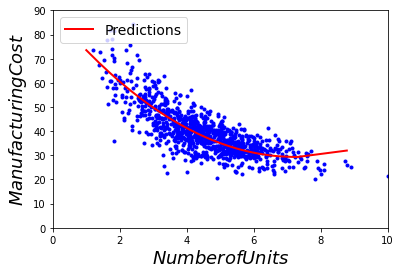

In [36]:
order = np.argsort(X_test.values.ravel())
sortedXPoly = X_test.values.ravel()[order]
sortedYPoly = y_test.values.ravel()[order]
sorted_predicPoly = y_con_regresion_poli[order]

plt.plot(X, y, "b.")
plt.plot(sortedXPoly, sorted_predicPoly, "r-", linewidth=2, label="Predictions")
plt.xlabel("$Number of Units$", fontsize=18)
plt.ylabel("$Manufacturing Cost$", rotation=90, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 90]);

Generación de errores

In [37]:
from sklearn import metrics
from sklearn.metrics import r2_score
import random

print(f'El modelo tomado es: Y = {regresion_lineal_poli.coef_[1]} X^2 + {regresion_lineal_poli.coef_[0]} X + {regresion_lineal_poli.intercept_}')

mae_regresion_lineal_multiple = metrics.mean_absolute_error(y_test,y_con_regresion_poli)
lista_para_mae.append(mae_regresion_lineal_multiple)
r2_regresion_lineal_multiple = r2_score(y_test,y_con_regresion_poli)
lista_para_r2.append(r2_regresion_lineal_multiple)

metrica_mae = metrics.mean_absolute_error(y_test, y_con_regresion_poli)
r2Score = r2_score(y_test, y_con_regresion_poli)
print(f'Error medio Absoluto (MAE): {metrica_mae}\n')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_con_regresion_poli))}\n')
print(f'R2_score : {r2Score}')


El modelo tomado es: Y = 1.1313609537119216 X^2 + -16.406381017212386 X + 88.80179909112496
Error medio Absoluto (MAE): 4.3833025759681075

Root Mean Squared Error: 5.832771301068425

R2_score : 0.7385501224942536


Realiza la regresión con **Ridge** y **Lasso**. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

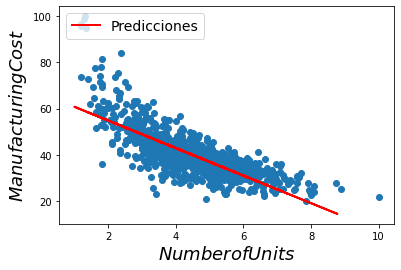

In [38]:
mi_ridge = Ridge(alpha=5.0,fit_intercept=True)
mi_ridge.fit(X_train, y_train)
X_para_ridge = X_test
y_para_ridge = mi_ridge.predict(X_para_ridge)
plt.scatter(X_train, y_train)
plt.plot(X_para_ridge, y_para_ridge, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$Number of Units$", fontsize=18)
plt.ylabel("$Manufacturing Cost$", rotation=90, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Metricas del **Ridge**


In [39]:
mae_ridge = metrics.mean_absolute_error(y_test,y_para_ridge)
lista_para_mae.append(mae_ridge)
r2_ridge= r2_score(y_test,y_para_ridge)
lista_para_r2.append(r2_ridge)

metrica_mae_ridge = metrics.mean_absolute_error(y_test, y_para_ridge)
r2Score = r2_score(y_test, y_para_ridge)
print(f'Error medio Absoluto (MAE): {metrica_mae_ridge}\n')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_para_ridge))}\n')
print(f'R2_score: {r2Score}\n')
print(f'El modelo aplicado es: Y = {mi_ridge.coef_[0]} X + {mi_ridge.intercept_}')

Error medio Absoluto (MAE): 5.016205738992834

Root Mean Squared Error: 7.111111949820097

R2_score: 0.6113903530239646

El modelo aplicado es: Y = -5.97003397211605 X + 66.75243237759665


Regrsión de **Lasso**

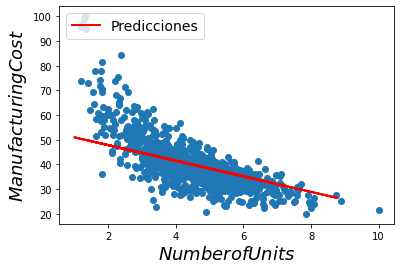

In [40]:
mi_lasso = Lasso(alpha=5.0,fit_intercept=True)
mi_lasso.fit(X_train, y_train)
X_para_lasso = X_test
y_para_lasso = mi_lasso.predict(X_para_ridge)
plt.scatter(X_train, y_train)
plt.plot(X_para_lasso, y_para_lasso, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$Number of Units$", fontsize=18)
plt.ylabel("$Manufacturing Cost$", rotation=90, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Metricas del **Lasso**

In [41]:
mae_lasso = metrics.mean_absolute_error(y_test,y_para_lasso)
print(f'mae_lasso: {mae_lasso}')
lista_para_mae.append(mae_lasso) 
r2_lasso= r2_score(y_test,y_para_lasso)
lista_para_r2.append(r2_lasso)
metrica_mae_lasso = metrics.mean_absolute_error(y_test, y_para_lasso)
r2Score = r2_score(y_test, y_para_lasso)
print(f'Error medio Absoluto (MAE): {metrica_mae_lasso}\n')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_para_lasso))}\n')
print(f'R2_score : {r2Score}\n')
print(f'El modelo aplicado es: Y = {mi_lasso.coef_} X + {mi_lasso.intercept_}\n')

mae_lasso: 5.681207654677401
Error medio Absoluto (MAE): 5.681207654677401

Root Mean Squared Error: 8.409660991642687

R2_score : 0.456505036516648

El modelo aplicado es: Y = [-3.15572458] X + 54.16195119377412



Grafico **MAE**

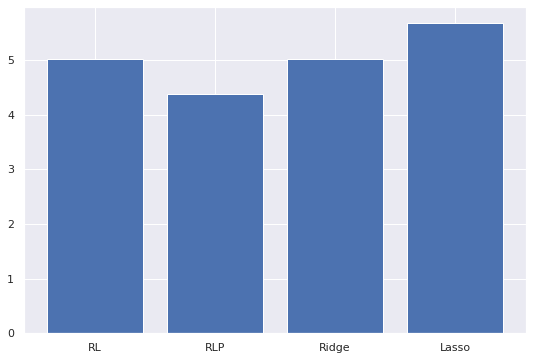

In [53]:
nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')
plt.bar(nombres, lista_para_mae[:4])
plt.show()

Grafico de r cuadrada

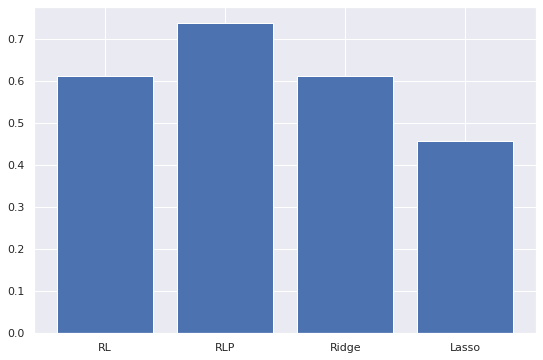

In [54]:
nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')
plt.bar(nombres, lista_para_r2)
plt.show()

Grafica del **MAE** Box Plot

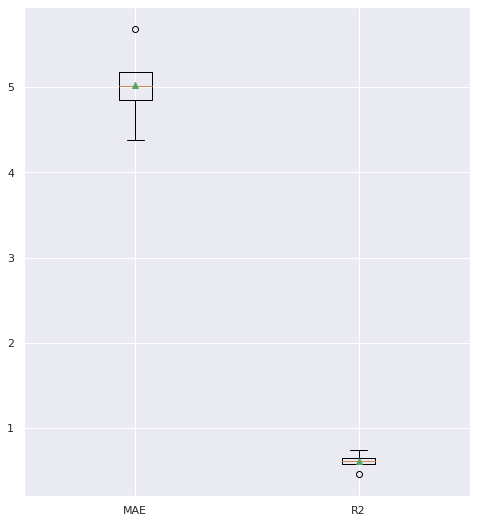

In [116]:
nombres=list()
nombres.append('MAE')
nombres.append('R2')

#grafica del MAE (de los cuatro métodos)
sns.set(rc={'figure.figsize':(8,9)})
error_list = list()
error_list.append(lista_para_mae)
error_list.append(lista_para_r2)

plt.boxplot(error_list, labels=nombres, showmeans=True)
plt.show()

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [123]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
18388,2041000025,20141203T000000,474000.0,2,1.00,1090,3160,1.0,0,0,...,7,840,250,1926,0,98109,47.6385,-122.344,1070,3160
8011,2206700215,20140822T000000,375000.0,4,2.00,2070,9822,1.0,0,0,...,7,2070,0,1955,0,98006,47.5660,-122.140,1300,9572
11884,5631501323,20140805T000000,309500.0,3,1.50,1340,13560,1.0,0,0,...,7,1340,0,1968,0,98028,47.7410,-122.234,1540,15000
134,2767602356,20150126T000000,675000.0,4,3.50,2140,2278,3.0,0,0,...,9,2140,0,2005,0,98107,47.6734,-122.380,1540,2285
19910,7853360990,20150102T000000,430000.0,3,2.50,1950,4949,2.0,0,0,...,7,1950,0,2009,0,98065,47.5155,-121.870,2200,5740
7096,2114300290,20140929T000000,411500.0,5,3.00,2420,7740,1.0,0,0,...,7,1360,1060,1929,1969,98106,47.5360,-122.358,1840,6780
21461,7787920230,20150408T000000,518000.0,5,2.50,2890,13104,2.0,0,0,...,8,2890,0,2006,0,98019,47.7277,-121.958,3020,9300
11742,1994200260,20140819T000000,869900.0,6,4.50,2750,4400,2.0,0,0,...,8,1770,980,1987,0,98103,47.6883,-122.335,1860,4400
12739,9264911210,20150226T000000,320000.0,5,3.00,2970,7000,1.0,0,0,...,8,1810,1160,1979,0,98023,47.3079,-122.341,2630,8062
21376,1282300995,20150222T000000,365000.0,3,2.25,1310,915,2.0,0,0,...,7,1060,250,2007,0,98144,47.5738,-122.293,1500,1215


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [125]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [126]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


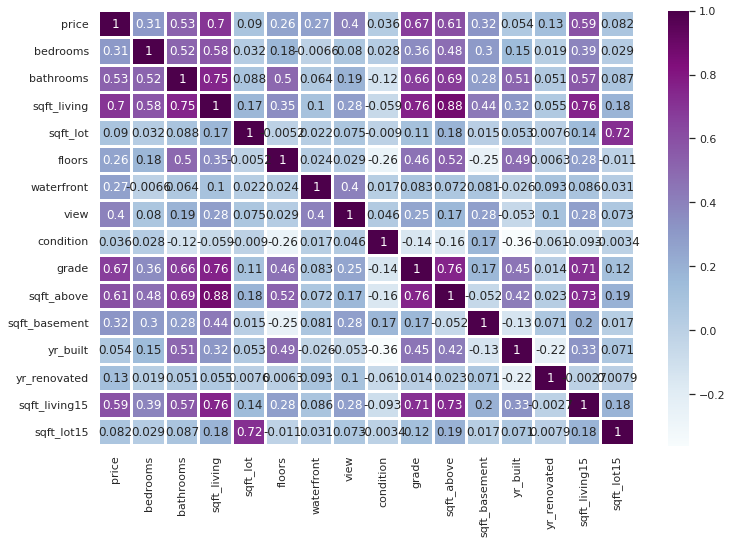

In [127]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='BuPu', linewidths = 2)
plt.show()

In [128]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101) #Este renglon nos lo fusilamos

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)
